Problem Statement: A Chinese automobile company Geely Auto wants to understand the factors on which the price of the car depends in the American market because they aspire to enter the US market.

To Determine: Which variables are significant in predicting the price of a car How well those variables describe the price 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# reading the raw data available into a python dataframe
carData = pd.read_csv('CarPrice_Assignment.csv', encoding = 'palmos')

In [2]:
# Understand the data
carData.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# What type of values are stored in the columns?
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the info we can see that there are total 26 columns; out of which price is the dependent variable and we need to analyse 25 independent variables with respect to their significance in predicting the price

In [4]:
#Determine Key of the data set
lenOfData = len(carData)
print("Total number of records", lenOfData)
print("Count of unique values in each column")
print(carData.nunique())
#Looking at the nunique results find the keys
#check if the car_ID is unique 
uniqueIDInCarData = carData.car_ID.unique()
if len(uniqueIDInCarData) == lenOfData:
    print("car_ID is unique")
else:
    print("car_ID is not unique")

Total number of records 205
Count of unique values in each column
car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64
car_ID is unique


In [5]:
# Analysing the data for DATA ClEANING
print("Data Cleaning")

# Step 1: Check if there is any row where every attribute is missing
missingDataCount = carData.isnull().all(axis=1).sum()
print("Number of rows with all the missing attributes is", missingDataCount)

# Step 2: percentage of missing value in each column
missingDataCount = round((carData.isnull().sum()/lenOfData)*100,2)
print("Percentage of missing data \n", missingDataCount)

Data Cleaning
Number of rows with all the missing attributes is 0
Percentage of missing data 
 car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


It is clear from the above results that there is no missing value in the dataset

Let's analyse each feature in the data set

In [6]:
# Analyze symboling
carData['symboling'].describe
eachValueCount = carData.groupby('symboling').symboling.count()
print(eachValueCount)

symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
Name: symboling, dtype: int64


In [7]:
#Count of -2 is too low i.e. 3 compared to the count of other insurance risk ratings
# But if we see it as two buckets(<=0 and >0) then the data gets balanced
# It is a categorical variable; let's categorize it as safe(<=0) and risky (>0)

In [8]:
carData['symboling']= carData['symboling'].apply(lambda x: "safe" if x<=0 else "risky")                                      

In [9]:
eachValueCount = carData.groupby('symboling').symboling.count()
print(eachValueCount)

symboling
risky    113
safe      92
Name: symboling, dtype: int64


In [10]:
# Analyze carname
# CarName has first word as car_company and second word as car model
carData['CarName'].head(5)

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [11]:
# Split this variable to get company name as an independent variable
carData['CompanyName'] = pd.DataFrame(carData.CarName.str.split(' ',expand=False))
carData['CompanyName'] = pd.DataFrame(carData.CarName.str.split(' ',expand=True))
carData['CompanyName'].head(5)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CompanyName, dtype: object

In [12]:
# Let us look at the names of the car company
# As it is a string column we need to check the spellings and lower/upper case value
# We are performing this step to ensure that the same carcompany does not exist with different names 
# due to case insensitivity or spelling error 
eachValueCount = carData.groupby('CompanyName').CompanyName.count()
print(eachValueCount)

CompanyName
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CompanyName, dtype: int64


In [13]:
# As we can see there are car company name that are same but appear different due to slight change in
# spelling or due to difference in case

# Nissan - nissan
# maxda - mazda
# porcshce - porsche
# toyota - toyouta
# vokswagen - volkswagen - vw

# Not correcting this issue will lead to wrong model creation and hence wrong analysis

In [14]:
# Convert all the company names to lower case
carData['CompanyName'] = carData['CompanyName'].str.lower()
eachValueCount = carData.groupby('CompanyName').CompanyName.count()
print(eachValueCount)

CompanyName
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CompanyName, dtype: int64


In [15]:
# The above step solved the problem for nissan - Nissan
# Let us proceed to make following consistent maxda - mazda porcshce - porsche toyota - toyouta vokswagen - volkswagen - vw
carData['CompanyName'] = carData['CompanyName'].replace(to_replace=['maxda','porcshce','toyouta','vokswagen','vw'],value=['mazda','porsche','toyota','volkswagen','volkswagen'])
eachValueCount = carData.groupby('CompanyName').CompanyName.count()
print(eachValueCount)

CompanyName
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: CompanyName, dtype: int64


In [16]:
#Count of mercury, renault, alfa-romero, chevrolet, jaguar is too low compared to the count of data of other companies

In [17]:
# Drop CarName as this is not required anymore
carData.drop(['CarName'],axis=1,inplace = True)
print(carData.head(5))

   car_ID symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1     risky      gas        std        two  convertible        rwd   
1       2     risky      gas        std        two  convertible        rwd   
2       3     risky      gas        std        two    hatchback        rwd   
3       4     risky      gas        std       four        sedan        fwd   
4       5     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwa

In [18]:
# Analyze fueltype
eachValueCount = carData.groupby('fueltype').fueltype.count()
print(eachValueCount)

fueltype
diesel     20
gas       185
Name: fueltype, dtype: int64


In [19]:
# No change required in fueltype feature as of now because there only two different categories

In [20]:
# Analyze aspiration
eachValueCount = carData.groupby('aspiration').aspiration.count()
print(eachValueCount)

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64


In [21]:
# No change required in aspiration feature as of now because there are two different categories

In [22]:
# Analyse doornumber
eachValueCount = carData.groupby('doornumber').doornumber.count()
print(eachValueCount)

doornumber
four    115
two      90
Name: doornumber, dtype: int64


In [23]:
# Analyse carbody
eachValueCount = carData.groupby('carbody').carbody.count()
print(eachValueCount)

carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64


Carbody is a categorical feature: No change required in carbody feature as of now because there are different categories and each value has considerable count.Though count of convertible and hardtop is quite low compared to other but will take all the categories further as we cannot take the decision of removing few carbody types on the basis of their count at this initial stage

In [24]:
# Analyse drivewheel
eachValueCount = carData.groupby('drivewheel').drivewheel.count()
print(eachValueCount)

drivewheel
4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64


drivewheel is a categorical feature: No change required in drivewheel feature as of now because there only three different categories: 4wd-four-wheel-drive fwd-front-wheel drive rwd-rear-wheel-drive

In [25]:
# Analyse enginelocation
eachValueCount = carData.groupby('enginelocation').enginelocation.count()
print(eachValueCount)

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64


enginelocation is a categorical feature: No change required in enginelocation feature as of now because there only two different categories Count of rear is too low compared to the count of front in our data set

In [26]:
# Analyse wheelbase
eachValueCount = carData.groupby('wheelbase').wheelbase.count()
print(eachValueCount)

wheelbase
86.6      2
88.4      1
88.6      2
89.5      3
91.3      2
93.0      1
93.1      5
93.3      1
93.7     20
94.3      1
94.5     21
95.1      1
95.3      4
95.7     13
95.9      5
96.0      1
96.1      2
96.3      6
96.5      8
96.6      1
96.9      2
97.0      4
97.2      5
97.3      7
98.4      7
98.8      6
99.1      6
99.2      1
99.4      1
99.5      1
99.8      2
100.4     6
101.2     4
102.0     1
102.4     5
102.7     1
102.9     2
103.3     2
103.5     3
104.3     6
104.5     2
104.9     2
105.8     3
106.7     1
107.9     6
108.0     1
109.1     5
110.0     3
112.0     1
113.0     2
114.2     4
115.6     2
120.9     1
Name: wheelbase, dtype: int64


wheelbase is a numeric column

In [27]:
# Function to return the outliers using interquartile range 
def outliers(feature):
    Q1, Q3 = np.percentile(feature, [25,75])
    iqr = Q3 - Q1
    lower_bound = Q1 - (iqr * 1.5)
    upper_bound = Q3 + (iqr * 1.5)
    return np.where((feature < lower_bound)|(feature > upper_bound))

In [28]:
# Find outliers in wheelbase - use interquartile range to find the outliers
outliersInwheelbase = outliers(carData.wheelbase)
print(outliersInwheelbase)


(array([70, 71, 73], dtype=int64),)


There are 3 outliers in wheelbase

In [29]:
# Analyse carlength
eachValueCount = carData.groupby('carlength').carlength.count()
print(eachValueCount)

carlength
141.1     1
144.6     2
150.0     3
155.9     3
156.9     1
157.1     1
157.3    15
157.9     1
158.7     3
158.8     1
159.1     3
159.3     1
162.4     1
163.4     1
165.3     6
165.6     1
165.7     1
166.3     7
166.8     2
167.3     2
167.5     2
168.7     4
168.8     2
168.9     4
169.0     4
169.1     1
169.7     3
170.2     2
170.7     3
171.2     1
         ..
176.6     2
176.8     5
177.3     1
177.8     6
178.2     1
178.4     1
178.5     1
180.2     2
180.3     1
181.5     1
181.7     1
183.1     1
183.5     2
184.6     2
186.6     6
186.7     7
187.5     1
187.8     2
188.8    11
189.0     2
190.9     2
191.7     1
192.7     3
193.8     1
197.0     1
198.9     4
199.2     1
199.6     2
202.6     2
208.1     1
Name: carlength, Length: 75, dtype: int64


carlength is a numeric column

In [30]:
# Find outliers in carlength - use interquartile range to find the outliers
outliersIncarlength = outliers(carData.carlength)
print(outliersIncarlength)

(array([18], dtype=int64),)


Only one outlier in carlength

In [31]:
#Analyse carwidth
eachValueCount = carData.groupby('carwidth').carwidth.count()
print(eachValueCount)

carwidth
60.3     1
61.8     1
62.5     1
63.4     1
63.6    11
63.8    24
63.9     3
64.0     9
64.1     2
64.2     6
64.4    10
64.6     2
64.8     4
65.0     3
65.2     7
65.4    15
65.5     8
65.6     6
65.7     4
66.0     1
66.1     2
66.2     1
66.3     6
66.4     1
66.5    23
66.6     1
66.9     5
67.2     6
67.7     2
67.9     5
68.0     1
68.3     2
68.4    10
68.8     1
68.9     4
69.6     2
70.3     3
70.5     1
70.6     1
70.9     1
71.4     3
71.7     3
72.0     1
72.3     1
Name: carwidth, dtype: int64


carwidth is a numeric column

In [32]:
# Find outliers in carwidth - use interquartile range to find the outliers
outliersIncarwidth = outliers(carData.carwidth)
print(outliersIncarwidth)

(array([  6,   7,   8,  70,  71,  73,  74, 129], dtype=int64),)


There are 8 outliers in carwidth

Note wheelbase also had outlier at 70,71,73

In [33]:
# Analyse carheight
eachValueCount = carData.groupby('carheight').carheight.count()
print(eachValueCount)

carheight
47.8     1
48.8     2
49.4     2
49.6     4
49.7     3
50.2     6
50.5     2
50.6     5
50.8    14
51.0     1
51.4     2
51.6     7
52.0    12
52.4     1
52.5     3
52.6     7
52.8     6
53.0     6
53.1     1
53.2     1
53.3     4
53.5     3
53.7     5
53.9     2
54.1    10
54.3     8
54.4     2
54.5    10
54.7     2
54.8     1
54.9     6
55.1     5
55.2     1
55.4     1
55.5     9
55.6     1
55.7    12
55.9     1
56.0     1
56.1     7
56.2     3
56.3     2
56.5     2
56.7     8
57.5     3
58.3     1
58.7     4
59.1     3
59.8     2
Name: carheight, dtype: int64


car height is a numeric column

In [34]:
# Find outliers in carheight - use interquartile range to find the outliers
outliersIncarheight = outliers(carData.carheight)
print(outliersIncarheight)

(array([], dtype=int64),)


In [35]:
# Analyse curbweight
eachValueCount = carData.groupby('curbweight').curbweight.count()
print(eachValueCount)

curbweight
1488    1
1713    1
1819    1
1837    1
1874    2
1876    2
1889    1
1890    1
1900    1
1905    1
1909    2
1918    3
1938    1
1940    1
1944    1
1945    1
1950    1
1951    1
1956    1
1967    2
1971    1
1985    1
1989    3
2004    1
2008    1
2010    1
2015    1
2017    1
2024    2
2028    1
       ..
3075    2
3086    1
3095    1
3110    1
3130    1
3131    1
3139    2
3151    1
3157    1
3197    1
3217    1
3230    2
3252    2
3285    1
3296    1
3366    1
3380    1
3430    1
3485    1
3495    1
3505    1
3515    1
3685    1
3715    1
3740    1
3750    1
3770    1
3900    1
3950    1
4066    2
Name: curbweight, Length: 171, dtype: int64


curbweight is a numeric column

In [36]:
# Find outliers in curbweight - use interquartile range to find the outliers
outliersIncurbweight = outliers(carData.curbweight)
print(outliersIncurbweight)

(array([], dtype=int64),)


In [37]:
# Analyse enginetype
eachValueCount = carData.groupby('enginetype').enginetype.count()
print(eachValueCount)

enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: enginetype, dtype: int64


In [38]:
# dohcv is a spelling mistake as no engine of this type exist
# also 'c' and 'v' are adjecent keys in keyboard so spelling mistake can happen
#replace dohcv with dohc
# similarly, replace ohcv and ohcf with ohc
carData['enginetype'] = carData['enginetype'].replace(to_replace=['dohcv','ohcv','ohcf'],value=['dohc','ohc','ohc'])

eachValueCount = carData.groupby('enginetype').enginetype.count()
print(eachValueCount)

enginetype
dohc      13
l         12
ohc      176
rotor      4
Name: enginetype, dtype: int64


In [39]:
# Analyse cylindernumber
eachValueCount = carData.groupby('cylindernumber').cylindernumber.count()
print(eachValueCount)

cylindernumber
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
Name: cylindernumber, dtype: int64


In [40]:
# cylindernumber seems to be numeric values like eight(8), five(5) etc but it is not continous and hence, will be used as categorical variable

In [41]:
# Analyze enginesize
eachValueCount = carData.groupby('enginesize').enginesize.count()
print(eachValueCount)

enginesize
61      1
70      3
79      1
80      1
90     12
91      5
92     15
97     14
98     14
103     1
108    13
109     8
110    12
111     1
119     1
120     7
121     6
122    15
130     4
131     2
132     2
134     2
136     5
140     2
141     7
145     1
146     6
151     1
152     6
156     5
161     1
164     3
171     3
173     1
181     6
183     4
194     3
203     1
209     3
234     2
258     2
304     1
308     1
326     1
Name: enginesize, dtype: int64


In [42]:
# Find outliers in enginesize - use interquartile range to find the outliers
outliersInenginesize = outliers(carData.enginesize)
print(outliersInenginesize)

(array([15, 16, 17, 47, 48, 49, 71, 72, 73, 74], dtype=int64),)


There are 10 outliers in enginesize
Note: wheelbase, carwidht also had outlier at 71 and 73 index

In [43]:
#Analyze fuelsystem
eachValueCount = carData.groupby('fuelsystem').fuelsystem.count()
print(eachValueCount)

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: fuelsystem, dtype: int64


In [44]:
# Analyze boreratio
eachValueCount = carData.groupby('boreratio').boreratio.count()
print(eachValueCount)

boreratio
2.54     1
2.68     1
2.91     7
2.92     1
2.97    12
2.99     1
3.01     5
3.03    12
3.05     6
3.08     1
3.13     2
3.15    15
3.17     3
3.19    20
3.24     2
3.27     7
3.31     8
3.33     6
3.34     1
3.35     4
3.39     6
3.43     8
3.46     9
3.47     2
3.50     2
3.54     6
3.58     6
3.59     3
3.60     1
3.61     1
3.62    23
3.63     2
3.70     5
3.74     3
3.76     1
3.78     8
3.80     2
3.94     2
Name: boreratio, dtype: int64


boreratio is a numeric column

In [45]:
# Find outliers in boreratio - use interquartile range to find the outliers
outliersInboreratio = outliers(carData.boreratio)
print(outliersInboreratio)

(array([], dtype=int64),)


In [46]:
# Analyze stroke
eachValueCount = carData.groupby('stroke').stroke.count()
print(eachValueCount)

stroke
2.070     1
2.190     2
2.360     1
2.640    11
2.680     2
2.760     1
2.800     2
2.870     1
2.900     3
3.030    14
3.070     6
3.080     2
3.100     2
3.110     6
3.120     1
3.150    14
3.160     1
3.190     6
3.210     1
3.230    14
3.255     4
3.270     6
3.290     9
3.350     9
3.390    13
3.400    20
3.410     6
3.460     8
3.470     4
3.500     6
3.520     5
3.540     4
3.580     6
3.640     5
3.860     4
3.900     3
4.170     2
Name: stroke, dtype: int64


In [47]:
# Find outliers in stroke - use interquartile range to find the outliers
outliersInstroke = outliers(carData.stroke)
print(outliersInstroke)

(array([ 29,  47,  48, 111, 113, 130, 131, 134, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149], dtype=int64),)


There are many outliers in stroke

In [48]:
# Analyze compressionratio
eachValueCount = carData.groupby('compressionratio').compressionratio.count()
print(eachValueCount)

compressionratio
7.00      7
7.50      5
7.60      4
7.70      2
7.80      1
8.00      8
8.10      2
8.30      3
8.40      5
8.50     14
8.60      5
8.70      9
8.80      3
9.00     46
9.10      1
9.20      8
9.30     11
9.31      1
9.40     26
9.41      1
9.50     13
9.60      5
10.00     3
10.10     1
11.50     1
21.00     5
21.50     4
21.90     1
22.00     1
22.50     3
22.70     1
23.00     5
Name: compressionratio, dtype: int64


In [49]:
# Find outliers in compressionratio - use interquartile range to find the outliers
outliersIncompressionratio = outliers(carData.compressionratio)
print(outliersIncompressionratio)

(array([  9,  29,  49,  63,  66,  67,  68,  69,  70,  82,  83,  84,  90,
       108, 110, 112, 114, 116, 117, 124, 158, 159, 174, 182, 184, 187,
       192, 203], dtype=int64),)


There are many outliers in compressionratio

In [50]:
# Analyze horsepower
eachValueCount = carData.groupby('horsepower').horsepower.count()
print(eachValueCount)

horsepower
48      1
52      2
55      1
56      2
58      1
60      1
62      6
64      1
68     19
69     10
70     11
72      1
73      3
76      5
78      1
82      5
84      5
85      3
86      4
88      6
90      5
92      4
94      2
95      7
97      5
100     2
101     6
102     5
106     1
110     8
111     4
112     2
114     6
115     1
116     9
120     1
121     3
123     4
134     1
135     1
140     1
142     1
143     1
145     5
152     3
154     1
155     2
156     2
160     6
161     2
162     2
175     1
176     2
182     3
184     2
200     1
207     3
262     1
288     1
Name: horsepower, dtype: int64


In [51]:
# Find outliers in horsepower - use interquartile range to find the outliers
outliersInhorsepower = outliers(carData.horsepower)
print(outliersInhorsepower)

(array([ 49, 105, 126, 127, 128, 129], dtype=int64),)


In [52]:
# Analyze peakrpm
eachValueCount = carData.groupby('peakrpm').peakrpm.count()
print(eachValueCount)

peakrpm
4150     5
4200     5
4250     3
4350     4
4400     3
4500     7
4650     1
4750     4
4800    36
4900     1
5000    27
5100     5
5200    23
5250     7
5300     1
5400    13
5500    37
5600     1
5750     1
5800     7
5900     3
6000     9
6600     2
Name: peakrpm, dtype: int64


In [53]:
# Find outliers in peakrpm - use interquartile range to find the outliers
outliersInpeakrpm = outliers(carData.peakrpm)
print(outliersInpeakrpm)

(array([165, 166], dtype=int64),)


In [54]:
# Analyze citympg
eachValueCount = carData.groupby('citympg').citympg.count()
print(eachValueCount)

citympg
13     1
14     2
15     3
16     6
17    13
18     3
19    27
20     3
21     8
22     4
23    12
24    22
25     8
26    12
27    14
28     7
29     3
30     8
31    28
32     1
33     1
34     1
35     1
36     1
37     6
38     7
45     1
47     1
49     1
Name: citympg, dtype: int64


In [55]:
# Find outliers in citympg - use interquartile range to find the outliers
outliersIncitympg = outliers(carData.citympg)
print(outliersIncitympg)

(array([18, 30], dtype=int64),)


In [56]:
# Analyze highwaympg
eachValueCount = carData.groupby('highwaympg').highwaympg.count()
print(eachValueCount)

highwaympg
16     2
17     1
18     2
19     2
20     2
22     8
23     7
24    17
25    19
26     3
27     5
28    13
29    10
30    16
31     8
32    16
33     9
34    14
36     2
37    13
38    17
39     2
41     3
42     3
43     4
46     2
47     2
50     1
53     1
54     1
Name: highwaympg, dtype: int64


In [57]:
# Find outliers in highwaympg - use interquartile range to find the outliers
outliersInhighwaympg = outliers(carData.highwaympg)
print(outliersInhighwaympg)

(array([18, 30, 90], dtype=int64),)


In [58]:
# Analyze price - Dependent variable
eachValueCount = carData.groupby('price').price.count()
print(eachValueCount)

price
5118.0     1
5151.0     1
5195.0     1
5348.0     1
5389.0     1
5399.0     1
5499.0     1
5572.0     2
6095.0     1
6189.0     1
6229.0     2
6295.0     1
6338.0     1
6377.0     1
6479.0     1
6488.0     1
6529.0     1
6575.0     1
6649.0     1
6669.0     1
6692.0     2
6695.0     1
6785.0     1
6795.0     1
6849.0     1
6855.0     1
6918.0     1
6938.0     1
6989.0     1
7053.0     1
          ..
18920.0    1
18950.0    1
19045.0    1
19699.0    1
20970.0    1
21105.0    1
21485.0    1
22018.0    1
22470.0    1
22625.0    1
23875.0    1
24565.0    1
25552.0    1
28176.0    1
28248.0    1
30760.0    1
31400.5    1
31600.0    1
32250.0    1
32528.0    1
34028.0    1
34184.0    1
35056.0    1
35550.0    1
36000.0    1
36880.0    1
37028.0    1
40960.0    1
41315.0    1
45400.0    1
Name: price, Length: 189, dtype: int64


In [59]:
# Find outliers in price - use interquartile range to find the outliers
outliersInprice = outliers(carData.price)
print(outliersInprice)

(array([ 15,  16,  17,  47,  48,  49,  70,  71,  72,  73,  74, 126, 127,
       128, 129], dtype=int64),)


There are many outliers in price

Note: index 70, 71, 73 is common as an outlier in many features as well in price also. We should not remove this considering as an outlier because this can be a main factor in determining the results as it is recurring in many features.

Other index values in price which are appearing as outlier also have outlier value in other features like index 126, 127, 128, 129 are outliers in horsepower, index 49 is in compression ratio. Hence, it may be showing some pattern and these features can prove to be significant hence, we should not remove outliers at this point. Main reason for this is the size of data set which is very small and making it smaller may lead to wrong results. We also should not impute values in place of outliers because at most positions of the outliers over here are common in independent and dependent variable which can be an information for the model and by replacing it with a metrics like mean etc we may loose the information.

In [60]:
# The list of outliers is huge; in total their are 66 outliers which means 205 - 66 records will be left. 
# As the dataset will remain too small we should not perform outlier removal
# still to match the models from both dataset let's create another dataframe in parallel named as carDataOutliersFree after normalising the data

In [61]:
# Lets create a dataframe that has only numerical columns
carDataNumeric = carData[['wheelbase','carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
print(carDataNumeric.head(10))

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   
5       99.8      177.3      66.3       53.1        2507         136   
6      105.8      192.7      71.4       55.7        2844         136   
7      105.8      192.7      71.4       55.7        2954         136   
8      105.8      192.7      71.4       55.9        3086         131   
9       99.5      178.2      67.9       52.0        3053         131   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000    

In [62]:
carDataNumeric.shape

(205, 14)

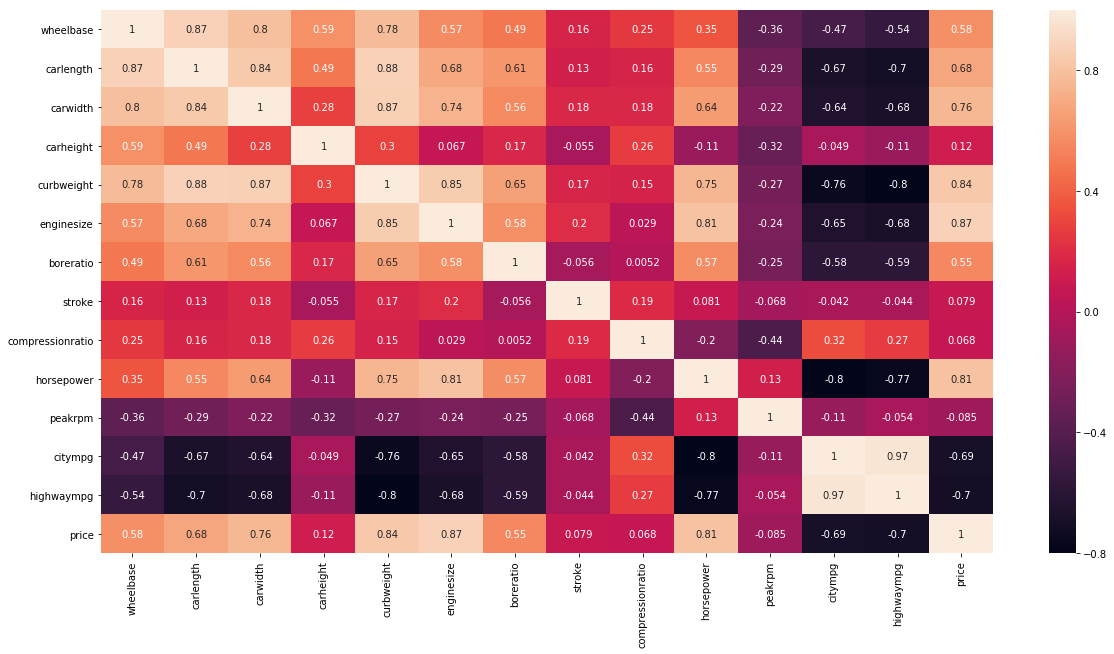

In [63]:
# Find correlation between all the numeric columns including the price i.e. dependent variable
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(carDataNumeric.corr(),annot = True)

From the above plot we can find the following points: Positively correlated variables: wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio,compressionratio,price
Negatively correlated variables: most of the variables are negatively correlated with peakrpm, citympg, highwaympg
Note correlation doesn't imply causation. Hence, we can still not be sure about the variables that are the main derivatives of car price

Correlation may help further if we get stuck at a decision where a variable in presence of another variable seems to be less significant then we can see the correlation of that variable and if the correlation is high then we should have domain knowledge and good reasoning to drop or keep that variable

From the above plot we can find the following points: Positively correlated variables: wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio,compressionratio,price Negatively correlated variables: most of the variables are negatively correlated with peakrpm, citympg, highwaympg Note correlation doesn't imply causation. Hence, we can still not be sure about the variables that are the main derivatives of car price

Correlation may help further if we get stuck at a decision where a variable in presence of another variable seems to be less significant then we can see the correlation of that variable and if the correlation is high then we should have domain knowledge and good reasoning to drop or keep that variable

Also we can refer to the correlation if all a variable seem to be significant but has high VIF then we can refer that what all variables are correlated because of which VIF is high

In [64]:
# Lets create a dataframe that has only categorical columns 
carDataCategorical = carData[['symboling','doornumber','cylindernumber','CompanyName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']]
print(carDataCategorical.head(5))

  symboling doornumber cylindernumber  CompanyName fueltype aspiration  \
0     risky        two           four  alfa-romero      gas        std   
1     risky        two           four  alfa-romero      gas        std   
2     risky        two            six  alfa-romero      gas        std   
3     risky       four           four         audi      gas        std   
4     risky       four           five         audi      gas        std   

       carbody drivewheel enginelocation enginetype fuelsystem  
0  convertible        rwd          front       dohc       mpfi  
1  convertible        rwd          front       dohc       mpfi  
2    hatchback        rwd          front        ohc       mpfi  
3        sedan        fwd          front        ohc       mpfi  
4        sedan        4wd          front        ohc       mpfi  


In [65]:
carDataCategorical.shape

(205, 11)

In [66]:
# There are in total 11 categorical columns out of which 3 represents category but are assigned numeric value 

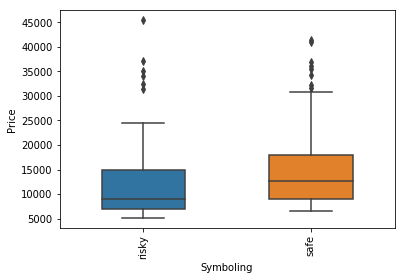

In [67]:
# Find the relationship between categorical columns and Dependent variable price
# symboling vs price
bplot = sns.boxplot(x='symboling',y='price',data=carData,width = 0.5)  
plt.xlabel("Symboling")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [68]:
# After looking at the box plot symboling does not seem to be a significant variable in determining price becasue when auto is riksy
# then also the price is high but we cannot remove it on this basis because if the insurance risk rating is high so that may mean that
# it includes that price also. Hence, let's analyse further

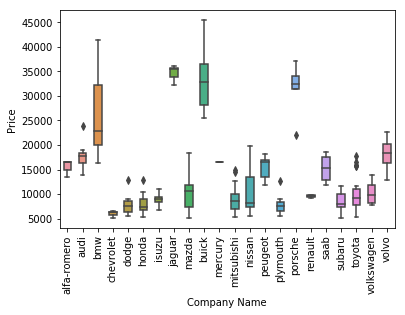

In [69]:
# Find the relationship between categorical columns and Dependent variable price
# CompanyName vs price
bplot = sns.boxplot(x='CompanyName',y='price',data=carData,width = 0.5)  
plt.xlabel("Company Name")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [70]:
# The graph shows that bmw, buick, jaguar, porsche have quite high price compared to the other car models

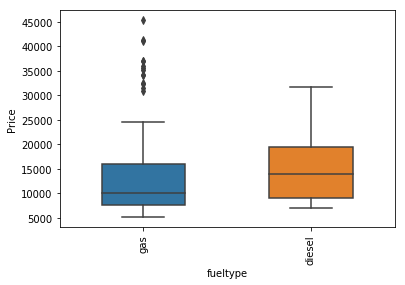

In [71]:
# fueltype vs price
bplot = sns.boxplot(x='fueltype',y='price',data=carData,width = 0.5)
plt.xlabel("fueltype")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [72]:
# Fuletype diesel has higher highest, lowest, median, first and third quartile than gas

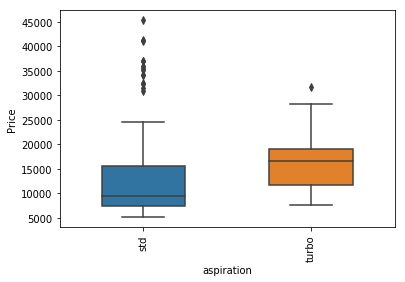

In [73]:
# aspiration vs price
bplot = sns.boxplot(x='aspiration',y='price',data=carData,width = 0.5)
plt.xlabel("aspiration")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [74]:
# aspiration turbo has higher highest, lowest, median, first and third quartile than std

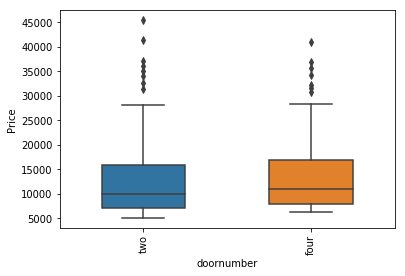

In [75]:
# doornumber vs price
bplot = sns.boxplot(x='doornumber',y='price',data=carData,width = 0.5)
plt.xlabel("doornumber")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

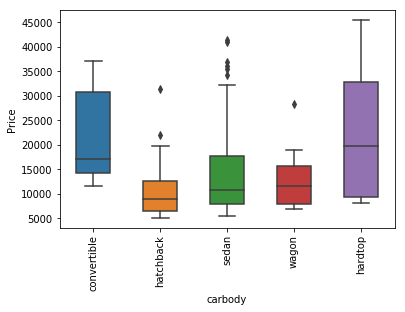

In [76]:
# carbody vs price
bplot = sns.boxplot(x='carbody',y='price',data=carData,width = 0.5)
plt.xlabel("carbody")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [77]:
# carbody hardtop price varies in a big range where as median of convertible is good compared to hatchback, sedan, wagon 
# but there is a big difference in it's third and 1st quartile

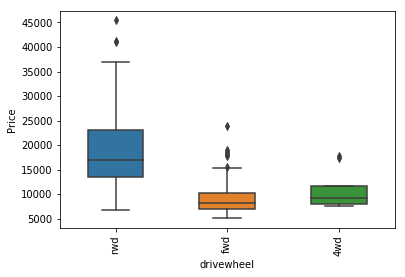

In [78]:
# drivewheel vs price
bplot = sns.boxplot(x='drivewheel',y='price',data=carData,width = 0.5)
plt.xlabel("drivewheel")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

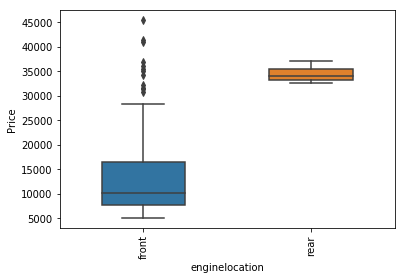

In [79]:
# enginelocation vs price
bplot = sns.boxplot(x='enginelocation',y='price',data=carData,width = 0.5)
plt.xlabel("enginelocation")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [80]:
# This may be an indication that the dataset of rear enginelocaion is too low

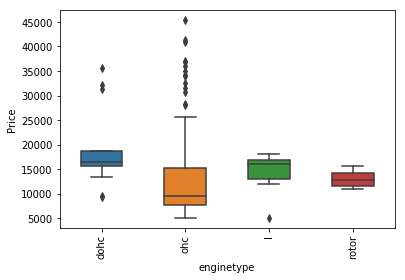

In [81]:
# enginetype vs price
bplot = sns.boxplot(x='enginetype',y='price',data=carData,width = 0.5)
plt.xlabel("enginetype")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

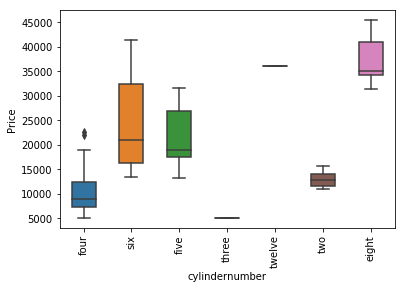

In [82]:
# cylindernumber vs price
bplot = sns.boxplot(x='cylindernumber',y='price',data=carData,width = 0.5)
plt.xlabel("cylindernumber")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [83]:
# The box plot shows that the data set for three and twelve is too small and six and five have similar pattern  except highest value
# Looking at the pattern cylinder number can have two categories - less than 5 and and gretate than equal to 5
carData['cylindernumber'] = carData['cylindernumber'].astype(str)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 2 if x=='two' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 3 if x=='three' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 4 if x=='four' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 5 if x=='five' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 6 if x=='six' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 8 if x=='eight' else x)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: 12 if x=='twelve' else x)
carData['cylindernumber'] = carData['cylindernumber'].astype(int)
carData['cylindernumber']= carData['cylindernumber'].apply(lambda x: "lessThan5" if x<5 else "5OrMoreThan5")
carData['cylindernumber'] = carData['cylindernumber'].astype(str)

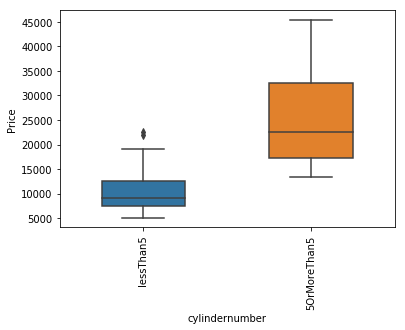

In [84]:
# Again draw cylindernumber vs price
bplot = sns.boxplot(x='cylindernumber',y='price',data=carData,width = 0.5)
plt.xlabel("cylindernumber")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

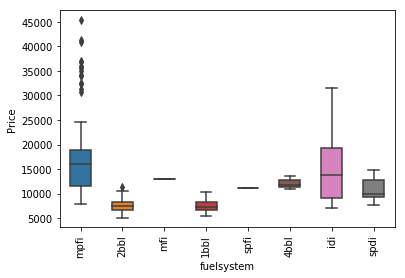

In [85]:
# fuelsystem vs price
bplot = sns.boxplot(x='fuelsystem',y='price',data=carData,width = 0.5)
plt.xlabel("fuelsystem")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [86]:
# the above box plots shows that there are few outliers in few categories i.e outliers in terms of price

Analyse all the categorical variables of these require dummy variable

In [87]:
carData.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,risky,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,risky,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,risky,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [88]:
# There are few columns which have only two unique values. Convert that to 0 and 1
# Enginelocation front to 1 and rear to 0
# aspiration     std   to 1 and turbo to 0
# fueltype       gas   to 1 and diesel to 0
# symboling      safe  to 1 and risky  to 0
# doornumber     four to 1 and  two   to 0 
# cylindernumber 5OrMoreThan5 to 1 and lessThan5 to 0

carData['enginelocation'] = carData['enginelocation'].map({'front':1, 'rear':0})
carData['aspiration'] = carData['aspiration'].map({'std':1, 'turbo':0})
carData['fueltype'] = carData['fueltype'].map({'gas':1, 'diesel':0})
carData['symboling'] = carData['symboling'].map({'safe':1, 'risky':0})
carData['doornumber'] = carData['doornumber'].map({'four':1, 'two':0})
carData['cylindernumber'] = carData['cylindernumber'].map({'5OrMoreThan5':1, 'lessThan5':0})

In [89]:
carData.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,0,1,1,0,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,0,1,1,0,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,0,1,1,0,hatchback,rwd,1,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,0,1,1,1,sedan,fwd,1,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,0,1,1,1,sedan,4wd,1,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [90]:
#create dummy variables for company name
companyName = pd.get_dummies(carData['CompanyName'])
companyName.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# We do not need 22 columns we can remove the one column for ease as we need n-1 dummy 
# but we should iterate each dummy variable and then take the decision on which one to remove
# For now let's remove the first and let's look what are the results
# columns for n categorical values in a category column
companyName = pd.get_dummies(carData['CompanyName'],drop_first = True)
companyName.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Note for creating dummy variables n-1 will be created for n categories in a column because one can be determined whereever the
# others are 0. Drop either the first column but it is better to drop the column or dummy variable that has lesser amount of data
# or reiterate again if any dummy column really reduces the R-square then replace it with the dropped one

In [93]:
#create dummy variables for carbody
carBody = pd.get_dummies(carData['carbody'],drop_first=True)
carBody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [94]:
# Create dummy variables for drivewheel
driveWheel = pd.get_dummies(carData['drivewheel'],drop_first=True)
driveWheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [95]:
# Create dummy variables for enginetype
engineType = pd.get_dummies(carData['enginetype'],drop_first=True)
engineType.head()

,l,ohc,rotor
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [96]:
# Create dummy variables for fuelsystem
fuelSystem = pd.get_dummies(carData['fuelsystem'],drop_first = True)
fuelSystem.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [97]:
# Adding the results to a new dataframe
carDataWithDummy = pd.concat([carData,companyName,carBody,driveWheel,engineType,fuelSystem],axis=1)
#Drop car_ID as it is not required for analysis
carDataWithDummy.drop(['car_ID'],axis=1,inplace=True)
# Drop the columns for which dummy variables are created from as these are not required anymore
carDataWithDummy.drop(['CompanyName','carbody','drivewheel','enginetype','fuelsystem'],axis=1,inplace=True)
carDataWithDummy.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,0,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,1,0,0
4,0,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,1,0,0


In [98]:
#Rename the new dummy columns and concatenate the names with the original column name to determine the feature to which dummy feature belongs
carDataWithDummy.rename(index=str,columns={'2bbl':'fuelsystem2bbl','4bbl':'fuelsystem4bbl','idi':'fuelsystemidi','mfi':'fuelsystemmfi','mpfi':'fuelsystemmpfi','spdi':'fuelsystemspdi','spfi':'fuelsystemspfi'},inplace=True)
carDataWithDummy.rename(index=str,columns={'l':'enginetypel','ohc':'enginetypeohc','rotor':'enginetyperotor'},inplace=True)
carDataWithDummy.rename(index=str,columns={'fwd':'drivewheelfwd','rwd':'drivewheelrwd'},inplace=True)
carDataWithDummy.rename(index=str,columns={'hardtop':'carbodyhardtop','hatchback':'carbodyhatchback','sedan':'carbodysedan','wagon':'carbodywagon'},inplace=True)
carDataWithDummy.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback',
       'carbodysedan', 'carbodywagon', 'drivewheelfwd', 'drivewheelrwd',
       'enginetypel', 'enginetypeohc', 'enginetyperotor', 'fuelsystem2bbl',
       'fuelsystem4bbl', 'fuelsystemidi', 'fuelsystemmfi', 'fuelsystemmpfi',
       'fuelsystemspdi', 'fuelsystemspfi'],
      dtype='object')

In [99]:
carDataWithDummy.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetypel,enginetypeohc,enginetyperotor,fuelsystem2bbl,fuelsystem4bbl,fuelsystemidi,fuelsystemmfi,fuelsystemmpfi,fuelsystemspdi,fuelsystemspfi
0,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,0,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,1,0,0
4,0,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,1,0,0


In [100]:
# How did we reach to 57 variables:
# initially there were 26 
# splitted carname into two which created 27 then removed the carname and kept only carmodel - left with 26
# 5 variables used to create dummy variables and then original variables were removed - added dummy variables (21+4+2+3+7-5) = 32 -> total 26 + 32 =  58
# remove car_id as it is a key and not required in the analysis -> left 57

In [101]:
# Outlierfree dataframe
carDataOutliersFree = carDataWithDummy
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[203])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[192])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[187])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[184])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[182])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[174])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[166])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[165])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[159])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[158])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[149])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[148])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[147])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[146])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[145])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[144])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[143])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[142])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[141])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[140])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[139])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[138])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[134])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[131])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[130])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[129])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[128])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[127])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[126])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[124])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[117])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[116])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[114])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[112])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[113])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[111])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[110])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[108])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[105])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[90])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[84])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[83])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[82])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[74])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[73])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[72])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[71])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[70])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[69])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[68])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[67])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[66])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[63])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[49])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[48])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[47])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[30])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[29])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[18])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[17])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[16])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[15])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[9])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[8])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[7])
carDataOutliersFree = carDataOutliersFree.drop(carDataOutliersFree.index[6])

In [102]:
carDataOutliersFree.shape

(139, 57)

# start with the dataframe that has outliers
WILL CREATE MODEL WITHOUT OUTLIER ALSO

In [103]:
# Let us start with creating models
# Split the data into training and testing data
# Putting feature variable to X
X = carDataWithDummy[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'enginetyperotor', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemidi', 'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi']]

# Putting response variable to y
y = carDataWithDummy['price']

In [104]:
X.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetypel,enginetypeohc,enginetyperotor,fuelsystem2bbl,fuelsystem4bbl,fuelsystemidi,fuelsystemmfi,fuelsystemmpfi,fuelsystemspdi,fuelsystemspfi
0,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,0,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,1,0,0
4,0,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,1,0,0


In [105]:
#random_state is used by the random number generator, it can be any integer
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=4)

C:\Users\I310541\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [106]:
#BUILDING A LINEAR MODEL

In [107]:
import statsmodels.api as sm          # Importing statsmodels
#X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
lm_1 = sm.OLS(y_train,X_train).fit()

C:\Users\I310541\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [108]:
X_train.shape

(143, 56)

In [109]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.80e-55
Time:                        17:06:15   Log-Likelihood:                -1218.6
No. Observations:                 143   AIC:                             2545.
Df Residuals:                      89   BIC:                             2705.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling          -85.1705    596.853  

Model 1: r-rquare is 0.977 adjusted r-square is .963

But when we look at the coefficients; the values are somewhere too high and somewhere too low. As some coefficents are too large there is some mistake in the model. Hence, we need to normalize the model

In [110]:
#Normalize the model
#user defined function to normalise 
def normalize(x):
    return((x-np.mean(x))/(max(x)-min(x)))

In [111]:
carDataWithDummy = carDataWithDummy.apply(normalize)

In [112]:
# Putting feature variable to X
X = carDataWithDummy[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'enginetyperotor', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemidi', 'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi']]

# Putting response variable to y
y = carDataWithDummy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=4)
#X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.80e-55
Time:                        17:06:20   Log-Likelihood:                 297.68
No. Observations:                 143   AIC:                            -487.4
Df Residuals:                      89   BIC:                            -327.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0021      0.015  

Now coefficients lie in the same range

In [113]:
# Putting feature variable to X
X = carDataWithDummy[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'enginetyperotor', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemidi', 'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi']]

# Putting response variable to y
y = carDataWithDummy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=4)

In [114]:
# Run RFE to automatically find the sifnificant variables out of 57 variables
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm3 = LinearRegression()
rfe = RFE(lm3, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False  True False False  True  True False  True False  True False  True
  True  True  True False  True False False False  True  True False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
  True False False  True False False False False]
[42  1 28 34  1  1  5  1 21  1  3  1  1  1  1 36  1 26 13  4  1  1 24 18
 31 35 38 29 22 17 19  2 16  1 33  9 14 39 32 10 11  7  8  6 40 15 12 20
  1 23 37  1 41 27 30 25]


In [115]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'bmw', 'buick', 'porsche', 'enginetyperotor', 'fuelsystemidi'],
      dtype='object')

In [116]:
#Building model using sklearn
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     152.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.42e-73
Time:                        17:06:26   Log-Likelihood:                 233.05
No. Observations:                 143   AIC:                            -438.1
Df Residuals:                     129   BIC:                            -396.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.0706      0.056  

In [117]:
carDataAfterRFE = carDataWithDummy.drop(['symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1)

In [118]:
# wheelbase p-value crosses the threshold 
X_train_rfe = X_train_rfe.drop('wheelbase', 1)

# Create a second fitted model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.74e-74
Time:                        17:06:29   Log-Likelihood:                 232.70
No. Observations:                 143   AIC:                            -439.4
Df Residuals:                     130   BIC:                            -400.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.0702      0.056  

In [119]:
# compression ratio p-value crosses the threshold 
X_train_rfe = X_train_rfe.drop('compressionratio', 1)

# Create a second fitted model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.17e-75
Time:                        17:06:30   Log-Likelihood:                 232.01
No. Observations:                 143   AIC:                            -440.0
Df Residuals:                     131   BIC:                            -404.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
fueltype           -0.0092      0.010     

R-square 0.942 Adjusted R-square 0.937

In [120]:
# fueltype and fuelsystemidi p-value crosses the threshold 
# let's check the VIF 

CHECKING VIF

In [121]:
# User Defined function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [122]:
# Calculating Vif value

vif_cal(input_data=carDataWithDummy.drop(['compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

C:\Users\I310541\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
12,fuelsystemidi,inf
3,curbweight,8.430000
4,enginesize,6.070000
2,carwidth,4.890000
10,porsche,2.960000
1,enginelocation,2.870000
5,boreratio,2.170000
7,peakrpm,1.830000
9,buick,1.610000


Keep on creating a better model till the model has variables with insignificant variables, till multi colinearity exist and till we do not get a good adjusted r-square value and until we do not get small mean root square error.

In [123]:
# As fueltype and fuelsystemidi both have high p-value and have inf VIF which means these can be perfectly determined by each other
# Let's not remove them together and remove one by one
# Remove fueltype
X_train_rfe = X_train_rfe.drop('fueltype', 1)

# Create a second fitted model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.17e-75
Time:                        17:06:37   Log-Likelihood:                 232.01
No. Observations:                 143   AIC:                            -440.0
Df Residuals:                     131   BIC:                            -404.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.2873      0.051     

In [124]:
# Calculating Vif value

vif_cal(input_data=carDataWithDummy.drop(['fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.43
3,enginesize,6.07
1,carwidth,4.89
9,porsche,2.96
0,enginelocation,2.87
4,boreratio,2.17
6,peakrpm,1.83
11,fuelsystemidi,1.76
8,buick,1.61
5,stroke,1.27


In [125]:
# Now we can clearly see that fueltype and fuelsystemidi were highly correlated because of removing fueltype the VIF of fuelsystemidi reduced
# But still the p-value of fuelsystemidi crosses threshold
# Remove fuelsystemidi
X_train_rfe = X_train_rfe.drop('fuelsystemidi', 1)

# Create a second fitted model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.89e-76
Time:                        17:06:39   Log-Likelihood:                 231.54
No. Observations:                 143   AIC:                            -441.1
Df Residuals:                     132   BIC:                            -408.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.2935      0.050     

In [126]:
# All the p-values are in control
# let's check vif
vif_cal(input_data=carDataWithDummy.drop(['fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
2,curbweight,7.94
3,enginesize,5.14
1,carwidth,4.85
9,porsche,2.93
0,enginelocation,2.82
4,boreratio,2.12
8,buick,1.55
6,peakrpm,1.37
10,enginetyperotor,1.21
5,stroke,1.16


In [127]:
# Dropping highly correlated variables and insignificant variables
# Step 1: going to the VIF list enginesize, curbweight have high vif
# Step 2: Let's look at their p-value
# p-value is with in the threshold of 0.05
# Step 3: p-value is with in range but VIF is high so, let's look at the correlation between these in the inittialy plotted heat map
# for categical varible we can refer to the below heat map

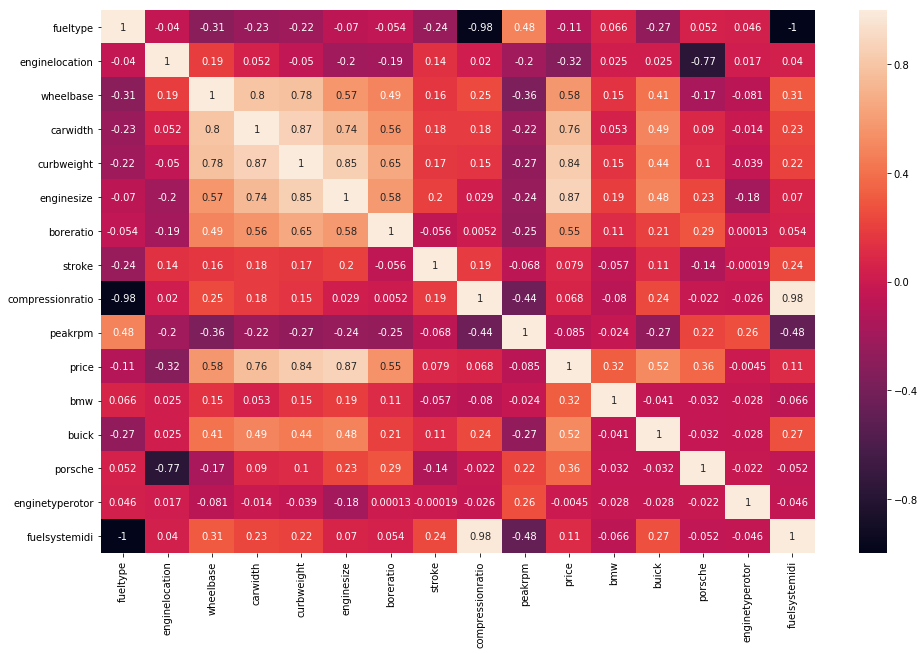

In [128]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carDataAfterRFE.corr(),annot = True)

Compare the heat map created initially and after model creation and look at those correlated variables that are common in both
There is actually no need to look in the initial heat map becasue if A is correlated to B in intial heat map then B has to be present in second heat map then only it could be considered
Purpose of refering to initial heat map is just to verify that the subset result in second heatmap is similar to the first i.e. we are going in the right direction

In [129]:
# At this point curbweight is highly correlated to enginesize and carwidth
# Let's remove one of these by looking at the p-value
# p-value in control
# let's not touch carwidth as it's VIF is smaller compare to other
# out of curbweight and engine size remove curbweight because it's coefficient(0.2463) is less than engine size (0.4434)
X_train_rfe = X_train_rfe.drop('curbweight', 1)

# Create a second fitted model
lm_9 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_9.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.12e-73
Time:                        17:06:45   Log-Likelihood:                 221.87
No. Observations:                 143   AIC:                            -423.7
Df Residuals:                     133   BIC:                            -394.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.3241      0.053     

R-square .933 Adjusted R-square .928

In [130]:
# let's check vif
vif_cal(input_data=carDataWithDummy.drop(['curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
2,enginesize,3.51
1,carwidth,2.91
0,enginelocation,2.79
8,porsche,2.79
3,boreratio,1.97
7,buick,1.53
5,peakrpm,1.37
9,enginetyperotor,1.19
4,stroke,1.16
6,bmw,1.12


In [131]:
# VIF for bore ratio is low compared to other varibales
# But the p-value for boreratio crosses the threshold

# enginesize again seems to have high correlation with someother variable i.e. it has been explained by someother variable also
# Let's again look at the heat map to find highly correlated variables
# enginesize is higly correlated with carwidth - - p-value in control for both, coefficient of enginesize > carwidth

Note: we can try by removing boreratio but remember it was significant in presence of some variable and now has become insignificant. so we should look at two models parellely; one with boreratio and another without boreratio

In [132]:
# At this point let's create two models
# one with removing carwidth as enginesize and carwidth are highly correlated (lm_9_1)
# another by removing bore ratio (lm_9_2)
# comparing two let's move forward
X_train_rfe1 = X_train_rfe.drop('carwidth', 1)

# Create a second fitted model
lm_9_1 = sm.OLS(y_train,X_train_rfe1).fit()

#Let's see the summary of our second linear model
print(lm_9_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.89e-58
Time:                        17:06:50   Log-Likelihood:                 182.54
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     134   BIC:                            -320.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.1365      0.065     

In [133]:
vif_cal(input_data=carDataWithDummy.drop(['carwidth','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
7,porsche,2.74
0,enginelocation,2.51
1,enginesize,2.46
2,boreratio,1.84
6,buick,1.46
4,peakrpm,1.36
3,stroke,1.16
8,enginetyperotor,1.16
5,bmw,1.10


In [134]:
X_train_rfe2 = X_train_rfe.drop('boreratio', 1)

# Create a second fitted model
lm_9_2 = sm.OLS(y_train,X_train_rfe2).fit()

#Let's see the summary of our second linear model
print(lm_9_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.82e-74
Time:                        17:06:53   Log-Likelihood:                 221.51
No. Observations:                 143   AIC:                            -425.0
Df Residuals:                     134   BIC:                            -398.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.3251      0.053     

In [135]:
vif_cal(input_data=carDataWithDummy.drop(['boreratio','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
2,enginesize,3.21
0,enginelocation,2.79
1,carwidth,2.71
7,porsche,2.71
6,buick,1.47
4,peakrpm,1.27
8,enginetyperotor,1.15
5,bmw,1.12
3,stroke,1.11


In [136]:
# removing boreratio gives all p-values in threshold except porsche let's remove carwidth now from the model where we removed boreratio 
X_train_rfe = X_train_rfe2.drop('carwidth', 1)

# Create a second fitted model
lm_10 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.80e-59
Time:                        17:06:56   Log-Likelihood:                 181.31
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     135   BIC:                            -322.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.1230      0.064     

In [137]:
vif_cal(input_data=carDataWithDummy.drop(['carwidth','boreratio','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
6,porsche,2.61
0,enginelocation,2.49
1,enginesize,1.74
5,buick,1.43
3,peakrpm,1.27
2,stroke,1.11
7,enginetyperotor,1.11
4,bmw,1.10


In [138]:
# Let's remove stroke as it's p-value is exceeding the threshold
X_train_rfe = X_train_rfe.drop('stroke', 1)

# Create a second fitted model
lm_11 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.11e-59
Time:                        17:06:59   Log-Likelihood:                 180.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     136   BIC:                            -326.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.1288      0.064     

In [139]:
# All the p-values are within threshold 
# R-square .881
# Adjusted R-square .875
# let's look at VIF
vif_cal(input_data=carDataWithDummy.drop(['stroke','carwidth','boreratio','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
5,porsche,2.59
0,enginelocation,2.48
1,enginesize,1.63
4,buick,1.43
2,peakrpm,1.26
6,enginetyperotor,1.11
3,bmw,1.08


In [140]:
#porsche has high VIF
# let's create a model without porsche
# Let's remove posche as it's VIF is high
X_train_rfe = X_train_rfe.drop('porsche', 1)

# Create a second fitted model
lm_12 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.33e-58
Time:                        17:07:02   Log-Likelihood:                 174.77
No. Observations:                 143   AIC:                            -337.5
Df Residuals:                     137   BIC:                            -319.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.2868      0.046     

In [141]:
# All the p-values are in range
# R-square .871
# Adjusted R-square .865
# let's look at VIF
vif_cal(input_data=carDataWithDummy.drop(['porsche','stroke','carwidth','boreratio','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
1,enginesize,1.57
4,buick,1.42
2,peakrpm,1.24
0,enginelocation,1.14
5,enginetyperotor,1.11
3,bmw,1.07


In [142]:
# Note: all the features in model 12 are within the threshold of p-value and VIF 
# R-square .871
# Adjusted R-square .865
# let's try to change a model a bit
# As for all the models the bore ratio was coming fine but we had to remove because at one step it's p-value changed 
# Therefore, let's see after adding it if the model improves

X_train_rfe['boreratio'] = carDataWithDummy['boreratio']
# Create a second fitted model
lm_13 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_13.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.91e-59
Time:                        17:07:05   Log-Likelihood:                 178.39
No. Observations:                 143   AIC:                            -342.8
Df Residuals:                     136   BIC:                            -322.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.2680      0.046     

In [143]:
# Adjusted R-square and R-squre improved a bit and all the p-values are within the threshold of 0.05
# let's look at VIF
vif_cal(input_data=carDataWithDummy.drop(['porsche','stroke','carwidth','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'],axis=1), dependent_col="price")

,Var,Vif
1,enginesize,2.20
2,boreratio,1.67
5,buick,1.45
3,peakrpm,1.31
0,enginelocation,1.15
6,enginetyperotor,1.15
4,bmw,1.07


In [144]:
# VIF is also fine; heat map shows that enginesize and boreration are correlated by .58
# Now we need to take the decision out of model 12 and model 13

# Prediction with Model 12

In [145]:
X_test.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetypel,enginetypeohc,enginetyperotor,fuelsystem2bbl,fuelsystem4bbl,fuelsystemidi,fuelsystemmfi,fuelsystemmpfi,fuelsystemspdi,fuelsystemspfi
1,-0.44878,0.097561,0.180488,-0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.058537,-0.858537,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
82,-0.44878,0.097561,-0.819512,-0.560976,0.014634,-0.083282,-0.012676,0.032683,-0.293740,0.107616,...,-0.058537,0.141463,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,-0.458537,0.956098,-0.004878
76,-0.44878,0.097561,0.180488,-0.560976,0.014634,-0.147422,-0.249989,-0.125650,-0.243740,-0.247310,...,-0.058537,0.141463,-0.019512,0.678049,-0.014634,-0.097561,-0.004878,-0.458537,-0.043902,-0.004878
102,0.55122,0.097561,0.180488,0.439024,0.014634,0.047913,0.157474,0.049350,0.197927,0.287213,...,-0.058537,0.141463,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
71,0.55122,0.097561,0.180488,0.439024,0.014634,0.491062,0.426130,0.482683,0.231260,0.459439,...,-0.058537,0.141463,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878


In [146]:
# Adding  constant variable to test dataframe
#X_test = sm.add_constant(X_test)
#X_test_m12 = sm.add_constant(X_test)
# Creating X_test_m12 dataframe by dropping variables from X_test_m12
X_test_m12 = X_test.drop(['porsche','stroke','carwidth','boreratio','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'], axis=1)

In [147]:
y_train.shape
y_train = y_train[:,np.newaxis]
y_train.shape

(143, 1)

In [148]:
X_test_m12.shape

(62, 6)

In [149]:
y_pred_m12 = lm_12.predict(X_test_m12)

# Model Evaluation

Text(0,0.5,'Car Price')

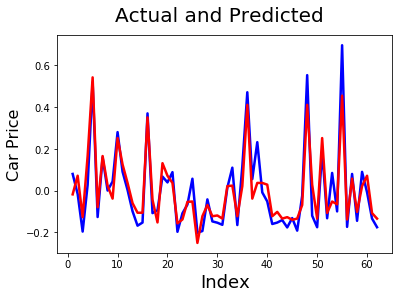

In [150]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m12, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

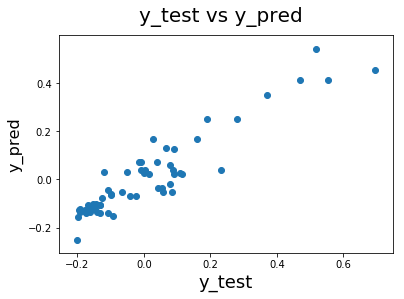

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m12)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

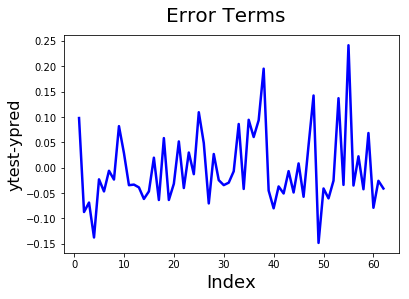

In [152]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m12, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

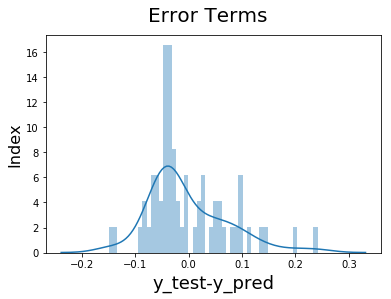

In [153]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m12),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [154]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m12)))

RMSE : 0.07348469006224213


In [155]:
# Let's predic using model 13 also where we have kept bore ratio
X_test_m13 = X_test.drop(['porsche','stroke','carwidth','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'], axis=1)

In [156]:
y_pred_m13 = lm_13.predict(X_test_m13)

Text(0,0.5,'Car Price')

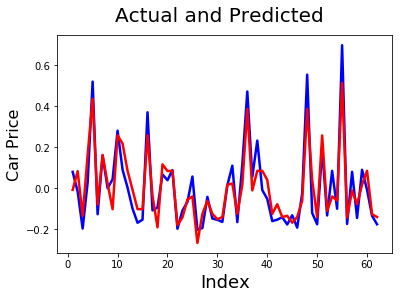

In [157]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m13, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

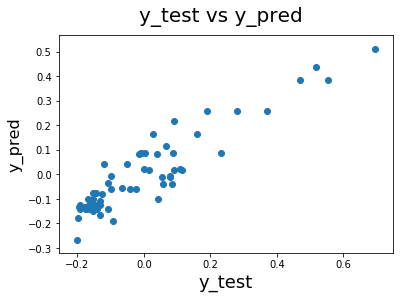

In [158]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

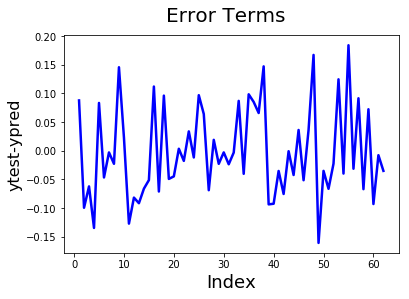

In [159]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m13, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

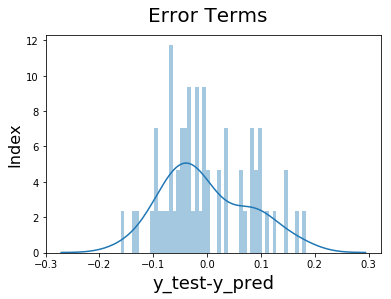

In [160]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m13),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [161]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m13)))

RMSE : 0.07871788158449279


In [162]:
# RMSE is less in model 12 hence, that is better than model 13

In [165]:
# The there was a fluctuation in the p-value of peakrpm though it was in range but compared to other variables it fluctuated
# also the error term is not perfect
# Let's try removing peakrpm
X_train_rfe = X_train_rfe.drop('boreratio', 1) # boreratio was added just to see the other model let's remove it
X_train_rfe = X_train_rfe.drop('peakrpm', 1)

# Create a second fitted model
lm_15 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_15.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.01e-57
Time:                        17:15:49   Log-Likelihood:                 170.48
No. Observations:                 143   AIC:                            -331.0
Df Residuals:                     138   BIC:                            -316.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.3222      0.046     

In [166]:
X_test_m15 = X_test.drop(['peakrpm','boreratio','porsche','stroke','carwidth','curbweight','fuelsystemidi','fueltype','compressionratio','wheelbase','symboling', 'aspiration', 'doornumber',
        'carlength', 'carheight', 'cylindernumber',
        'horsepower', 'citympg', 'highwaympg',
       'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi'], axis=1)


In [167]:
y_pred_m15 = lm_15.predict(X_test_m15)

Text(0,0.5,'Index')

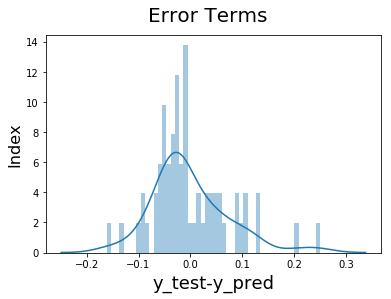

In [168]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m15),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

In [169]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m15)))

RMSE : 0.0734119141101837


# To be on a safer side let's create a model with the dataset that does not contain outliers

In [115]:
# Putting feature variable to X
X = carDataOutliersFree[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback', 'carbodysedan', 'carbodywagon', 'drivewheelfwd',
       'drivewheelrwd', 'enginetypel', 'enginetypeohc', 'enginetyperotor', 'fuelsystem2bbl', 'fuelsystem4bbl',
       'fuelsystemidi', 'fuelsystemmfi', 'fuelsystemmpfi', 'fuelsystemspdi', 'fuelsystemspfi']]

# Putting response variable to y
y = carDataOutliersFree['price']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=4)
lm_14 = LinearRegression()
rfe = RFE(lm_14, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False  True False False False False False False False  True False
  True False False False False False False  True  True False False False
  True False False False False False False False False  True False False
 False False  True  True  True  True  True  True False False False  True
 False False False False False False False  True]
[14 34  1 24 35 26 32 22 25 33  1 30  1 12 29 31 36 27 28  1  1 37  6  4
  1 20 40  2 10  9 11 19  5  1 38  3 39  8  1  1  1  1  1  1 23 13  7  1
 18 16 21 42 41 15 17  1]


In [116]:
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'cylindernumber', 'boreratio', 'audi', 'bmw', 'honda',
       'porsche', 'volkswagen', 'volvo', 'carbodyhardtop', 'carbodyhatchback',
       'carbodysedan', 'carbodywagon', 'enginetypeohc', 'fuelsystemspfi'],
      dtype='object')

Model 14 without outliers returned almost all the car model names which suggest it majorly depends only on the carmodel
which cannot be true hence, let's analyse on the basis of our previous model on original dataset.

Model 12 has following features that are the driving factors in determining the price:
1) enginelocation
2) enginesize
3) enginetyperotor i.e. engine of type rotor
4) peakrpm
5) car model bmw
6) car model buick 

Another model when determined with other combinations included below variables also 
1) car model audi
2) car model volvo
and did not include
1) peakrpm

So, final decision when looking at the graphs also
Major factors:
1) enginesize
2) enginelocation
3) enginetyperotor 
4) carmodel


Note: There is a reason befind not dropping the car models that seem to be significant i.e. have low p-value and do not have multicollinearity i.e. have low VIF. A thought might come that what will Gelly Auto do with the names of the car model as it would only need to know the desired factors that determine price so it can use those factors in it's cars and to earn more profit in American market and it cannot keep these model name the why to not remove the model names: The answer is the price really depends on the name of the model for example, it's high when the model name is BMW and removing it will mislead the other variables. It helps in estimating impact of other variables. Removing it will overestimate the impact of other variables.

Though the data available for enginelocation rear has only 3 records but as we saw earlier our training data included rear for training also
Engine size is one of the main factor in determining the price and so is car width. We have not taken carwidth in the model because as we saw enginesize and carwidth were correlated hence, one can determine the other. Also bigger the engine is bigger the size of car is required. It has a coefficient of 0.9089
Enginetype rotor has a coefficient of .1654 which means on an increase of 

# Assessing the model build

Below are the metrics 

found R-square = .877 Adjusted R-square = .871 

Note: not much difference in R-square and adjusted R-sqaure which is good and .871 describes that we are able to explain 87.1% of the variation in data which is also very good

RMSE = 0.073 which means the error is very small i.e. the difference between predicted and actual is very less
Below are the metrics found
R-square = .877
Adjusted R-square = .871
Note: not much difference in R-square and adjusted R-sqaure which is good
and .871 describes that we are able to explain 87.1% of the variation in data which is also very good

RMSE = 0.073 which means the error is very small i.e. the difference between predicted and actual is very less

![image.png](attachment:image.png) 

Y-predict vs. Y-test graph shows that there is not much difference i.e. randomness in the error term exists. 

Also, actual and predicted are higly overlaping model is predicting pretty well.

Now we know what variables are important for Geely Auto but how much should it spend on which variable to have a correct and good price is also important. The coefficients define that 
hence, using linear regression y = mx+c 
price = m1*x1 + m2*x2 +m3*x3 +m4*x4 + m5*x5 
price = m1*('enginelocation') + m2*('enginesize') + m3*('enginetyperotor') +  m4*(BMW) + m5*(buick) + intercept

Here, enginetyperotor i.e. x3 = 1 if a car has engine type = rotor else x3 = 0
similar for car model also i.e. if the car_model is out of the 2 in model then x4 or x5 is 1 else 0.

here m1, m2, m3, m4, m5 are the slopes which determine how much will be the change in price on change of x.

So, if the brand is BMW the price increases by .1845. But as Geely Auto does not have to do with brand/model name hence, other than car models are the important factors for Geely Auto. Why can't we ignore car models is explained above.
